# OUTLIER DETECTION

# Introduction

An outlier is an observation that is unlike the other observations. It is rare, or distinct, or does not fit in some way.

# About Dataset

here wea re using 2 data sets

1-placement.csv

2-weight-height.csv



 1- in placement.csv data set I have 3 columns and 1000 rows

['cgpa', 'placement_exam_marks', 'placed']

2- in height weight dataset I have 3 columns and 10000 rowws
['Gender', 'Height', 'Weight']

# different methods to identify ouliers-
1-Innerquartile range method

2-Z-score method

3-Percentile method

# Reason for outliers
1-changes in system behaviour

2-fraudulent behaviour

3-human error

4-instrument error

5-simply through natural deviations in populations

# impact of outliers
Outliers can have many causes, such as:

-Measurement or input error.

-Data corruption.

-impact the mean and variance.

# treating the outliers

1 TRIMMING- Outliers ko hata dena

2-CAPPING - not remoove only change with min and max value

In [2]:
#importing libraries
import numpy as np  #for scientific computation
import pandas as pd #for data modeling, data analysis and data manipulation
import matplotlib.pyplot as plt #for creates a figure, creates a plotting area in a figure.
import seaborn as sb #helps to data visualization like boxplot

In [3]:
#extracting dataset
df=pd.read_csv('placement.csv')
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


# EDA (Exploratory data Analysis)
It is an approach that is used to analyze the data and discover trends, patterns, or check assumptions in data with the help of statistical summaries and graphical representations

In [4]:
#getting information of column
df.columns

Index(['cgpa', 'placement_exam_marks', 'placed'], dtype='object')

In [5]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [6]:
df.head

<bound method NDFrame.head of      cgpa  placement_exam_marks  placed
0    7.19                  26.0       1
1    7.46                  38.0       1
2    7.54                  40.0       1
3    6.42                   8.0       1
4    7.23                  17.0       0
..    ...                   ...     ...
995  8.87                  44.0       1
996  9.12                  65.0       1
997  4.89                  34.0       0
998  8.62                  46.0       1
999  4.90                  10.0       1

[1000 rows x 3 columns]>

In [7]:
df.tail()

,cgpa,placement_exam_marks,placed
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1
999,4.90,10.0,1


In [8]:
df.shape  # no of rows and column

(1000, 3)

In [9]:
df.info() # data tyoe plus no onf non null sabhi ke

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [10]:
#finding the null values
#agar null value hongi to true ni to false poori table banegi
df.isnull()

,cgpa,placement_exam_marks,placed
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
995,False,False,False
996,False,False,False
997,False,False,False
998,False,False,False


In [11]:
#finding the null values
#sare column me jitni null value sjongi inka sum nial lega
df.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

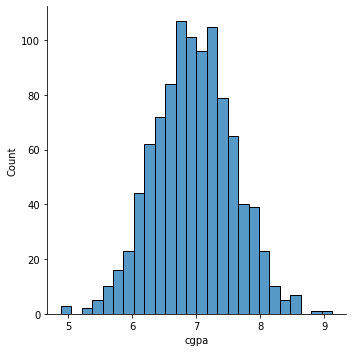

In [12]:
sb.displot(df['cgpa'])

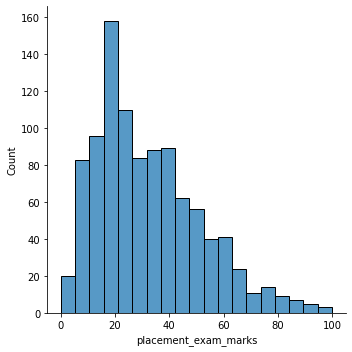

In [13]:
sb.displot(df['placement_exam_marks'])

we see pahla wala to badia normally distributed jhai aur doosra skewed hai

In [14]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


# 1-Z-Score method

Z_score= (Xi - mean) / standard deviation
where Xi is a data point, 'mean' is the mean of all X and 'standard deviation' the standard deviation of all X.¶
An outlier is then a normalized data point which has an absolute value greater than Zthr. That is:
|Z_score| > Zthr
Commonly used Zthr values are 2.5, 3.0 and 3.5. Here we will be using 3.0

i.e threshold of 3 or -3 is used and if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.


only on 1hale vale par apply ka rskate ahi

for normally distributed

u=mean

std=standard deviation

then using bellcurve

u+std and u-std= 68% value or population

u+2std and u-2std 95.4%

u+3std and u-3std 99.7%

to ham man ke chalte hai ki is ke bahr sab outliers hai


In [15]:
print("upperlimit",df['cgpa'].mean()+3*df['cgpa'].std())
print("lowerlimit",df['cgpa'].mean()-3*df['cgpa'].std())

upperlimit 8.808933625397177
lowerlimit 5.113546374602842


In [16]:
#now finding the outliers
df[(df['cgpa']>8.808933625397177)  |  (df['cgpa']<5.113546374602842)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# approach 2
finding the z-score for each row

In [17]:
df['cgpa_zscore']=(df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()

In [18]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


par mughe bas unhe hi rakhna hai jinka z score -3 se jyada and 3 se kam ho

In [19]:
#now finding the outliers
df[(df['cgpa_zscore']>3)  |  (df['cgpa_zscore']<-3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


# TRIMMING

In [20]:
new_df=df[(df['cgpa']<8.80)  &  (df['cgpa']>5.11)]

In [21]:
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


In [22]:
new_df.describe()  #new

,cgpa,placement_exam_marks,placed,cgpa_zscore
count,995.000000,995.000000,995.000000,995.000000
mean,6.963357,32.188945,0.487437,0.003437
std,0.600082,19.130298,0.500094,0.974320
min,5.230000,0.000000,0.000000,-2.810921
25%,6.550000,17.000000,0.000000,-0.667708
50%,6.960000,28.000000,0.000000,-0.002013
75%,7.365000,44.000000,1.000000,0.655563
max,8.620000,100.000000,1.000000,2.693239


In [23]:
df.describe()   #old

,cgpa,placement_exam_marks,placed,cgpa_zscore
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,6.961240,32.225000,0.489000,-1.600275e-14
std,0.615898,19.130822,0.500129,1.000000e+00
min,4.890000,0.000000,0.000000,-3.362960e+00
25%,6.550000,17.000000,0.000000,-6.677081e-01
50%,6.960000,28.000000,0.000000,-2.013321e-03
75%,7.370000,44.000000,1.000000,6.636815e-01
max,9.120000,100.000000,1.000000,3.505062e+00


# CAPPING

In [24]:
upper_limit=df['cgpa'].mean()+3*df['cgpa'].std()
lower_limit=df['cgpa'].mean()-3*df['cgpa'].std()


In [25]:
df['cgpa']=np.where(
     df['cgpa']>upper_limit,#condition hai 
     upper_limit,#true hine par
    #if fale
     np.where(
          df['cgpa']<lower_limit,#condition
          lower_limit,#true hone par
          df['cgpa']#false hone par as it is rahne do
     )
)


np.where(x,y,z)  # x ek conditionhai, y jab true to ye karna hai , z jab false ho to ye karna ahi

In [26]:
df.shape #purana shape 

(1000, 4)

In [27]:
df.describe()

,cgpa,placement_exam_marks,placed,cgpa_zscore
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,6.961499,32.225000,0.489000,-1.600275e-14
std,0.612688,19.130822,0.500129,1.000000e+00
min,5.113546,0.000000,0.000000,-3.362960e+00
25%,6.550000,17.000000,0.000000,-6.677081e-01
50%,6.960000,28.000000,0.000000,-2.013321e-03
75%,7.370000,44.000000,1.000000,6.636815e-01
max,8.808934,100.000000,1.000000,3.505062e+00


.

.

# 2-IQR METHOD

used for skewed distribution

STEPS -

calculate first(q1) and third(q3)quartile

find iqr =(q3-q1)

find lower and upper bound

lower=q1-iqr*1.5

upper=q3-iqr*1.5

upper lower ke bahar sab outlier honge

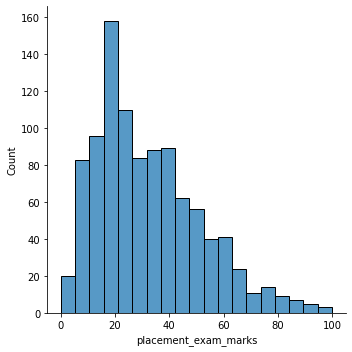

In [28]:
sb.displot(df['placement_exam_marks'])

### RIGHT SKEWED

In [29]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<AxesSubplot:xlabel='placement_exam_marks'>

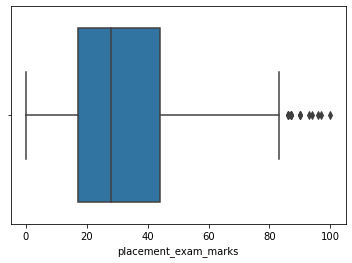

In [30]:
sb.boxplot(x=df['placement_exam_marks'])

#### finding IQR

In [31]:
q1=df['placement_exam_marks'].quantile(0.25)

q3=df['placement_exam_marks'].quantile(0.75)


In [32]:
q1

17.0

In [33]:
q3

44.0

In [34]:
iqr=q3-q1

In [35]:
iqr

27.0

In [36]:
lower_bound=q1-(iqr*1.5)
upper_bound=q3+(iqr*1.5)
print(lower_bound,upper_bound)

-23.5 84.5


## finding outliers

In [37]:
df[df['placement_exam_marks']>upper_bound ]

,cgpa,placement_exam_marks,placed,cgpa_zscore
9,7.75,94.0,1,1.280667
40,6.60,86.0,1,-0.586526
61,7.51,86.0,0,0.890992
134,6.33,93.0,0,-1.024910
162,7.80,90.0,0,1.361849
283,7.09,87.0,0,0.209061
290,8.38,87.0,0,2.303564
311,6.97,87.0,1,0.014223
324,6.64,90.0,0,-0.521580
630,6.56,96.0,1,-0.651472


In [38]:
df[df['placement_exam_marks']<lower_bound ]

#no vales becaure lower limit -23 and hamri data ki min value is colomn me 0 hai 

,cgpa,placement_exam_marks,placed,cgpa_zscore


# TRIMMING

In [39]:
new_df2=df[(df['placement_exam_marks']<upper_bound ) ]

In [40]:
new_df2

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.190000,26.0,1,0.371425
1,7.460000,38.0,1,0.809810
2,7.540000,40.0,1,0.939701
3,6.420000,8.0,1,-0.878782
4,7.230000,17.0,0,0.436371
...,...,...,...,...
995,8.808934,44.0,1,3.099150
996,8.808934,65.0,1,3.505062
997,5.113546,34.0,0,-3.362960
998,8.620000,46.0,1,2.693239


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='placement_exam_marks'>

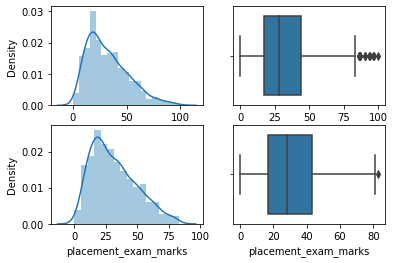

In [41]:
#now compairing with old and new one


plt.subplot(2,2,1)
sb.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sb.boxplot(x=df['placement_exam_marks'])

plt.subplot(2,2,3)
sb.distplot(new_df2['placement_exam_marks'])

plt.subplot(2,2,4)
sb.boxplot(x=new_df2['placement_exam_marks'])


# 3-Percentile method

percentile matlab utne log aapse peeche hai 

In [42]:
df2=pd.read_csv('weight-height.csv')

In [43]:
df2

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [44]:
df2.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [45]:
df2.columns


Index(['Gender', 'Height', 'Weight'], dtype='object')

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

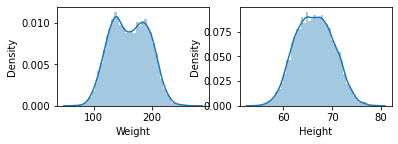

In [46]:
plt.subplot(2,2,1)
sb.distplot(df2['Weight'])
plt.subplot(2,2,2)
sb.distplot(df2['Height'])

we will be using height mera man hai

In [47]:
df2['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

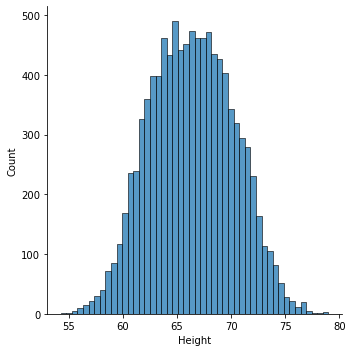

In [48]:
sb.displot(df2['Height'])

<AxesSubplot:xlabel='Height'>

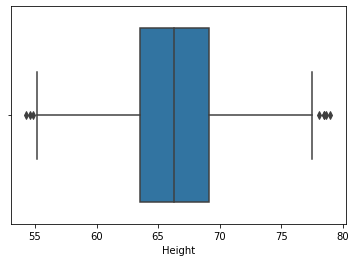

In [49]:
sb.boxplot(x=df2['Height'])

In [50]:
upper_thres=df2['Height'].quantile(0.99)
upper_thres


74.7857900583366

In [51]:
lower_thres=df2['Height'].quantile(0.01)
lower_thres

58.13441158671655

In [52]:
#now finding the outliers
df2[(df2['Height']>=74.78)  |  (df2['Height']<=58.13)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


# Trimming

In [53]:
new_df3=df2[(df2['Height']<=74.78)  &  (df2['Height']>=58.13)]

In [54]:
new_df3

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [55]:
new_df3['Height'].describe()#new

count    9799.000000
mean       66.363507
std         3.644267
min        58.134496
25%        63.577147
50%        66.317899
75%        69.119859
max        74.767447
Name: Height, dtype: float64

In [56]:
df2['Height'].describe()#old

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

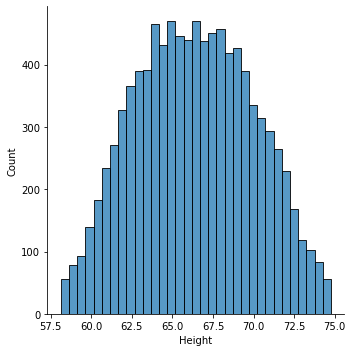

In [57]:
sb.displot(new_df3['Height'])

<AxesSubplot:xlabel='Height'>

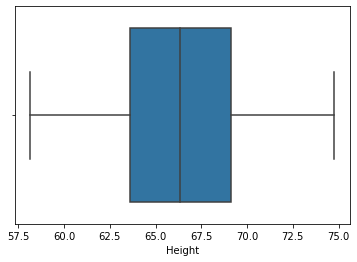

In [58]:
sb.boxplot(x=new_df3['Height'])

### no OUTLIERS

# Capping or Winsorization

In [59]:
df2['Height']=np.where(df2['Height']>=upper_thres,
        upper_thres,
        np.where(df2['Height']<=lower_thres,
          lower_thres,
          df2['Height']       
        )
        )

In [60]:
df2

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [61]:
df2['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

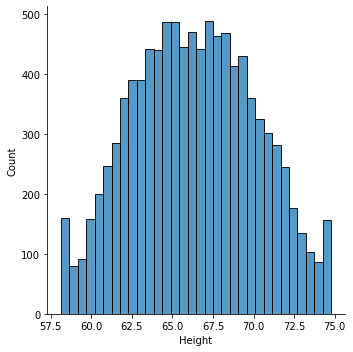

In [62]:
sb.displot(df2['Height'])

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

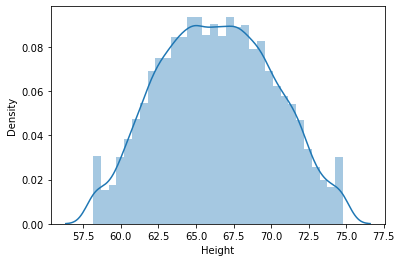

In [63]:
sb.distplot(df2['Height'])

<AxesSubplot:xlabel='Height'>

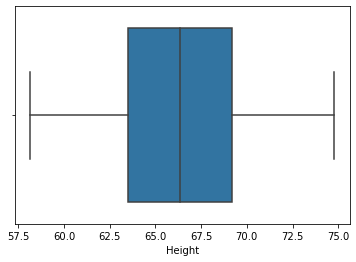

In [64]:
sb.boxplot(x=df2['Height'])

.

.

# Conclusion

Outlier detection and removal is a crucial data analysis step for a machine learning model, as outliers can significantly impact the accuracy of a model if they are not handled properly. The techniques discussed in this article, such as Z-score and Interquartile Range (IQR), are some of the most popular methods used in outlier detection. The technique to be used depends on the specific characteristics of the data, such as the distribution and number of variables, as well as the required outcome.

# THANK YOU